In [1]:
import networkx as nx
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import drive
from google.colab import files
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
interaction_ds = '/content/gdrive/MyDrive/Thesis/data/utilities/train_task.csv'
interaction50_ds = '/content/gdrive/MyDrive/Thesis/data/utilities/train_task_50+.csv'

question_ds = '/content/gdrive/MyDrive/Thesis/data/neurIPS_edu_competition_text.csv'
question_split_ds = '/content/gdrive/MyDrive/Thesis/data/neurIPS_edu_competition_text_split.csv'

question50_ds = '/content/gdrive/MyDrive/Thesis/data/neurIPS_edu_competition_text50+.csv'
question50_split_ds = '/content/gdrive/MyDrive/Thesis/data/neurIPS_edu_competition_text_split50+.csv'

In [13]:
algebra_questions = {10, 523, 533, 534, 30, 545, 38, 551, 550, 553, 555, 51, 564, 565, 54, 570, 572, 63, 579, 584, 76, 589, 77, 82, 90, 91, 604, 97, 610, 611, 110, 118, 119, 120, 122, 123, 124, 641, 642, 137, 138, 142, 658, 148, 150, 152, 670, 159, 160, 162, 167, 170, 686, 174, 184, 187, 193, 196, 709, 716, 717, 204, 206, 210, 725, 217, 740, 228, 230, 232, 235, 748, 237, 249, 762, 255, 776, 267, 781, 782, 279, 794, 801, 291, 808, 297, 302, 818, 306, 319, 834, 835, 836, 328, 844, 335, 850, 856, 858, 859, 862, 354, 868, 359, 872, 871, 877, 370, 371, 885, 379, 891, 384, 385, 898, 900, 389, 902, 392, 906, 396, 398, 404, 916, 409, 923, 414, 416, 421, 934, 433, 437, 441, 445, 453, 456, 459, 465, 468, 489, 490, 496, 498, 502}
numbers_questions = {0, 1, 2, 3, 6, 7, 8, 11, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 37, 40, 42, 43, 45, 46, 50, 52, 53, 55, 57, 58, 59, 60, 61, 65, 68, 69, 71, 72, 73, 75, 79, 80, 81, 86, 88, 92, 93, 96, 98, 99, 100, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 115, 117, 121, 126, 127, 128, 129, 131, 133, 134, 136, 139, 140, 141, 143, 144, 145, 147, 149, 153, 154, 157, 158, 161, 163, 164, 165, 166, 168, 169, 173, 175, 177, 178, 179, 180, 183, 185, 186, 188, 189, 190, 192, 195, 197, 198, 199, 208, 209, 211, 212, 213, 219, 220, 223, 225, 226, 233, 234, 238, 239, 240, 241, 242, 244, 248, 250, 252, 253, 254, 257, 259, 260, 263, 266, 269, 270, 276, 278, 281, 282, 283, 284, 285, 287, 289, 290, 292, 293, 294, 296, 299, 303, 304, 309, 310, 311, 312, 313, 314, 315, 318, 322, 325, 326, 327, 329, 332, 333, 336, 337, 338, 340, 342, 344, 345, 346, 347, 352, 356, 357, 360, 361, 366, 367, 368, 369, 372, 373, 374, 376, 377, 381, 382, 383, 391, 393, 395, 397, 399, 400, 401, 402, 405, 407, 408, 410, 417, 418, 419, 422, 423, 425, 426, 427, 428, 429, 435, 436, 438, 442, 443, 444, 446, 447, 448, 449, 450, 451, 452, 454, 457, 458, 460, 461, 463, 464, 469, 471, 472, 473, 474, 475, 477, 479, 480, 481, 482, 485, 486, 491, 493, 494, 495, 499, 500, 504, 505, 506, 509, 511, 512, 513, 516, 517, 518, 519, 521, 522, 524, 525, 527, 529, 531, 535, 538, 539, 544, 546, 547, 548, 554, 556, 557, 558, 559, 562, 563, 566, 568, 574, 578, 580, 581, 583, 585, 587, 588, 590, 592, 593, 594, 596, 597, 598, 599, 601, 602, 603, 605, 606, 607, 608, 613, 614, 615, 616, 617, 619, 621, 623, 624, 626, 627, 628, 629, 630, 632, 633, 634, 635, 637, 638, 639, 640, 644, 645, 646, 648, 649, 650, 651, 652, 653, 655, 656, 659, 660, 663, 665, 666, 671, 673, 674, 675, 676, 677, 678, 680, 688, 692, 693, 694, 696, 698, 699, 702, 703, 706, 707, 708, 714, 715, 719, 722, 724, 728, 730, 732, 733, 735, 736, 738, 739, 742, 743, 744, 745, 747, 749, 751, 752, 753, 754, 755, 757, 758, 759, 760, 763, 764, 765, 767, 769, 771, 773, 774, 775, 783, 785, 786, 787, 788, 789, 790, 791, 793, 795, 796, 797, 799, 800, 803, 804, 805, 807, 809, 810, 811, 812, 813, 816, 817, 819, 821, 825, 826, 828, 829, 830, 831, 832, 833, 839, 840, 841, 842, 843, 847, 849, 851, 852, 854, 857, 860, 864, 867, 876, 880, 881, 882, 883, 886, 887, 888, 889, 890, 892, 893, 895, 896, 897, 899, 904, 905, 908, 909, 911, 912, 915, 918, 921, 922, 924, 925, 926, 928, 929, 930, 932, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946}
geometry_questions = {514, 515, 4, 5, 520, 9, 12, 13, 14, 526, 528, 17, 530, 532, 20, 23, 536, 537, 26, 540, 541, 542, 543, 36, 549, 39, 552, 41, 44, 47, 560, 48, 561, 49, 567, 56, 569, 571, 573, 62, 575, 216, 577, 66, 67, 64, 576, 70, 582, 74, 586, 78, 591, 83, 595, 84, 85, 87, 600, 89, 94, 95, 609, 612, 105, 618, 106, 620, 622, 625, 116, 631, 636, 125, 130, 643, 132, 647, 135, 654, 657, 146, 661, 662, 151, 664, 155, 156, 667, 669, 668, 672, 679, 681, 682, 683, 172, 684, 171, 687, 176, 689, 690, 685, 691, 181, 182, 695, 697, 700, 701, 191, 704, 705, 194, 710, 711, 200, 201, 202, 203, 713, 712, 205, 207, 720, 721, 718, 723, 214, 215, 727, 729, 726, 218, 731, 221, 734, 222, 224, 737, 227, 741, 229, 231, 746, 236, 861, 750, 243, 756, 245, 246, 247, 761, 251, 766, 256, 768, 258, 770, 772, 261, 262, 264, 777, 265, 778, 268, 780, 779, 271, 784, 273, 274, 275, 272, 277, 280, 792, 798, 286, 288, 802, 806, 295, 298, 300, 301, 814, 815, 305, 307, 820, 308, 822, 823, 824, 827, 316, 317, 320, 321, 323, 324, 837, 838, 330, 331, 845, 846, 334, 848, 339, 853, 341, 855, 343, 348, 349, 350, 863, 351, 353, 865, 355, 866, 869, 358, 870, 873, 362, 875, 364, 365, 878, 879, 874, 363, 884, 375, 378, 380, 894, 386, 387, 388, 901, 390, 903, 394, 907, 910, 913, 914, 403, 917, 406, 919, 920, 411, 412, 413, 927, 415, 931, 420, 933, 935, 424, 430, 431, 432, 434, 947, 439, 440, 455, 462, 466, 467, 470, 476, 478, 483, 484, 487, 488, 492, 497, 501, 503, 507, 508, 510}

print('Algebra: ', len(algebra_questions), 'Numbers: ', len(numbers_questions), 'Geometry: ', len(geometry_questions))

Algebra:  144 Numbers:  509 Geometry:  295


## Interaction DS exploration

DataFrame shape: (1382727, 6)
First few rows:
   QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue
0         898    2111    280203          1              2            2
1         767    3062     55638          1              3            3
2         165    1156    386475          1              2            2
3         490    1653    997498          1              4            4
4         298    3912    578636          1              3            3


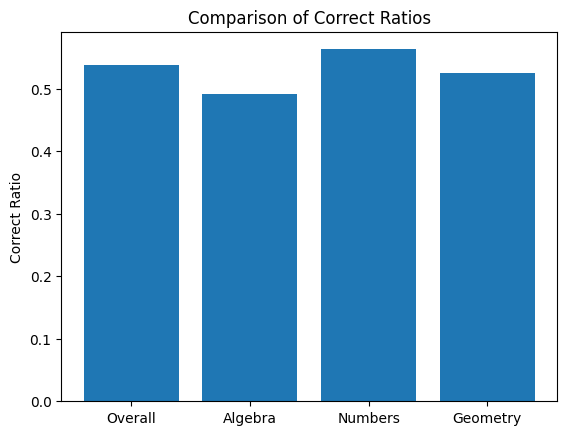

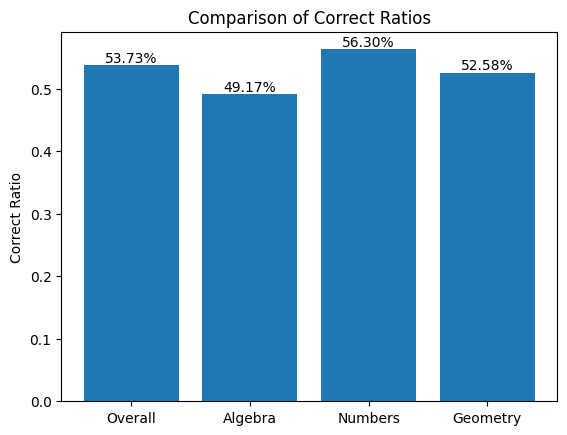

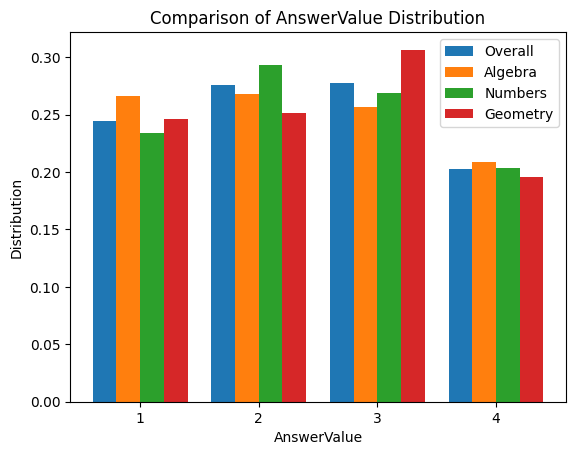

In [ ]:
df = pd.read_csv(interaction_ds)
# Basic Overview
print("DataFrame shape:", df.shape)
print("First few rows:")
print(df.head())


# Calculate the overall correct ratio
overall_correct_ratio = df['IsCorrect'].mean()

# Calculate the correct ratios for each category
algebra_correct_ratio = df[df['QuestionId'].isin(algebra_questions)]['IsCorrect'].mean()
numbers_correct_ratio = df[df['QuestionId'].isin(numbers_questions)]['IsCorrect'].mean()
geometry_correct_ratio = df[df['QuestionId'].isin(geometry_questions)]['IsCorrect'].mean()

# Plot the comparison
labels = ['Overall', 'Algebra', 'Numbers', 'Geometry']
ratios = [overall_correct_ratio, algebra_correct_ratio, numbers_correct_ratio, geometry_correct_ratio]

plt.bar(labels, ratios)
plt.ylabel('Correct Ratio')
plt.title('Comparison of Correct Ratios')
plt.show()

# Calculate the overall correct ratio
overall_correct_ratio = df['IsCorrect'].mean()

# Calculate the correct ratios for each category
algebra_correct_ratio = df[df['QuestionId'].isin(algebra_questions)]['IsCorrect'].mean()
numbers_correct_ratio = df[df['QuestionId'].isin(numbers_questions)]['IsCorrect'].mean()
geometry_correct_ratio = df[df['QuestionId'].isin(geometry_questions)]['IsCorrect'].mean()

# Prepare the data for plotting
labels = ['Overall', 'Algebra', 'Numbers', 'Geometry']
ratios = [overall_correct_ratio, algebra_correct_ratio, numbers_correct_ratio, geometry_correct_ratio]

# Plot the comparison with percentage labels
plt.bar(labels, ratios)
plt.ylabel('Correct Ratio')
plt.title('Comparison of Correct Ratios')

# Add percentage labels on the bars
for i, ratio in enumerate(ratios):
    plt.text(i, ratio, f'{ratio*100:.2f}%', ha='center', va='bottom')

plt.show()


# Filter the DataFrame for algebra, numbers, and geometry questions
algebra_df = df[df['QuestionId'].isin(algebra_questions)]
numbers_df = df[df['QuestionId'].isin(numbers_questions)]
geometry_df = df[df['QuestionId'].isin(geometry_questions)]

# Calculate the distribution of CorrectAnswer values for overall, algebra, numbers, and geometry questions
overall_dist = df['AnswerValue'].value_counts(normalize=True).sort_index()
algebra_dist = algebra_df['AnswerValue'].value_counts(normalize=True).sort_index()
numbers_dist = numbers_df['AnswerValue'].value_counts(normalize=True).sort_index()
geometry_dist = geometry_df['AnswerValue'].value_counts(normalize=True).sort_index()

# Plot the comparison
labels = ['1', '2', '3', '4']  # Assuming the CorrectAnswer values are integers from 1 to 4
x = np.arange(len(labels))
width = 0.2

plt.bar(x, overall_dist, width=width, label='Overall')
plt.bar(x + width, algebra_dist, width=width, label='Algebra')
plt.bar(x + 2 * width, numbers_dist, width=width, label='Numbers')
plt.bar(x + 3 * width, geometry_dist, width=width, label='Geometry')

plt.xlabel('AnswerValue')
plt.ylabel('Distribution')
plt.title('Comparison of AnswerValue Distribution')
plt.xticks(x + 1.5 * width, labels)
plt.legend()
plt.show()

   QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue
0         898    2111    280203          1              2            2
1         767    3062     55638          1              3            3
2         165    1156    386475          1              2            2
3         490    1653    997498          1              4            4
4         298    3912    578636          1              3            3

Number of unique UserId:  4918

Number of unique Answer:  1382727

Number of unique QuestionId:  948


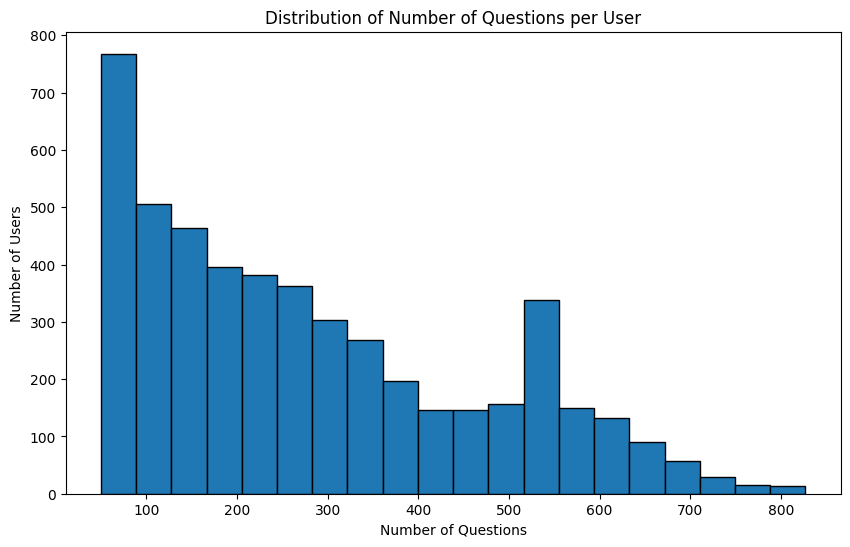

Minimum number of questions per user: 50


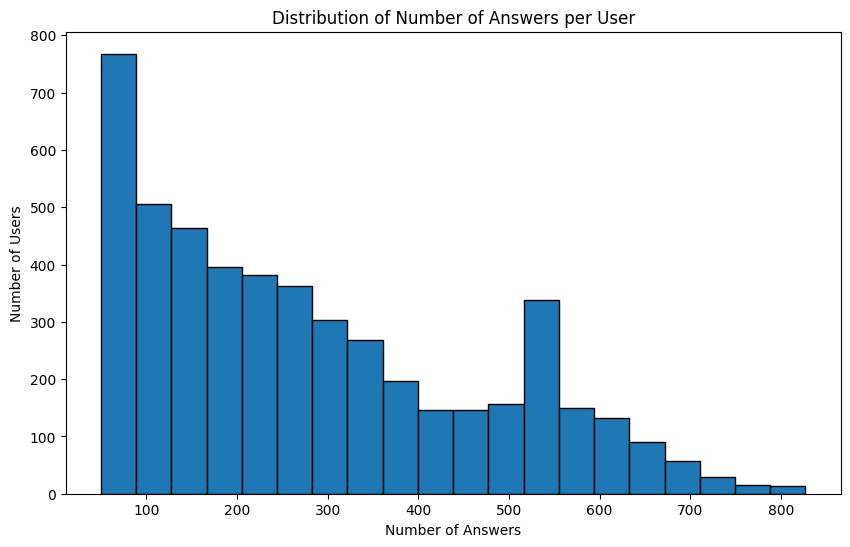

Minimum number of Answers per user: 50


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Thesis/data/utilities/train_task_3_4.csv')

print(df.head())


unique_user_ids = df['UserId'].nunique()
print("\nNumber of unique UserId: ", unique_user_ids)


unique_ans_ids = df['AnswerId'].nunique()
print("\nNumber of unique Answer: ", unique_ans_ids)

unique_question_ids = df['QuestionId'].nunique()
print("\nNumber of unique QuestionId: ", unique_question_ids)

question_counts = df.groupby('UserId')['QuestionId'].count()

import matplotlib.pyplot as plt
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(question_counts, bins=20, edgecolor='black')
plt.xlabel('Number of Questions')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Questions per User')
plt.show()

# Print the minimum number of questions per user
min_questions = question_counts.min()
print("Minimum number of questions per user:", min_questions)


answer_counts = df.groupby('UserId')['AnswerId'].count()


# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(question_counts, bins=20, edgecolor='black')
plt.xlabel('Number of Answers')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Answers per User')
plt.show()

# Print the minimum number of questions per user
min_questions = question_counts.min()
print("Minimum number of Answers per user:", min_questions)

   QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue
0         898    2111    280203          1              2            2
1         767    3062     55638          1              3            3
2         165    1156    386475          1              2            2
3         490    1653    997498          1              4            4
4         298    3912    578636          1              3            3


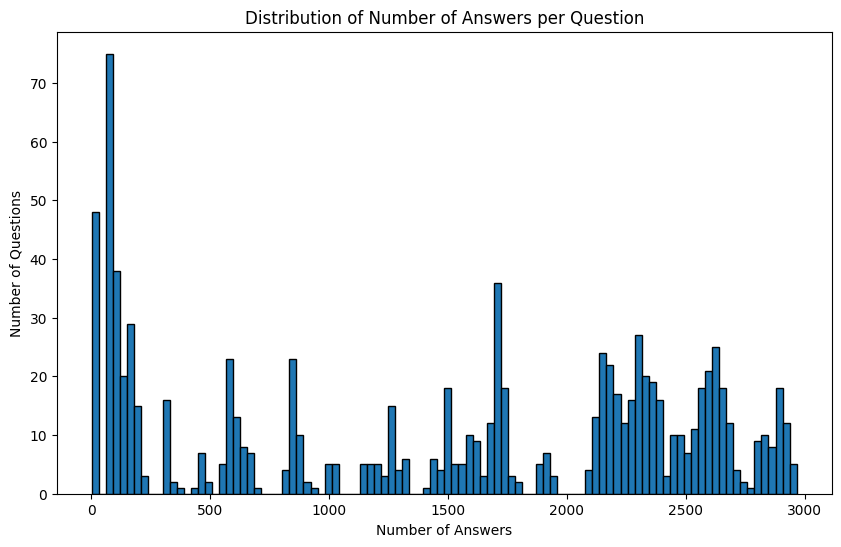

Minimum number of user per question: 4
Average number of users per question: 1458
Number of questions with less than 5 users: 15
Number of questions with less than 10 users: 33
Number of questions with less than 30 users: 48
Number of questions with less than 50 users: 48


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Thesis/data/utilities/train_task_3_4.csv')

print(df.head())


user_counts = df.groupby('QuestionId')['UserId'].nunique()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(user_counts, bins=100, edgecolor='black')
plt.xlabel('Number of Answers')
plt.ylabel('Number of Questions')
plt.title('Distribution of Number of Answers per Question')
plt.show()

# Print the minimum number of questions per user
min_users = user_counts.min()
print("Minimum number of user per question:", min_users)

avg_users_per_question = df.groupby('QuestionId')['UserId'].nunique().mean()
print("Average number of users per question:", int(avg_users_per_question))

question_counts = df.groupby('QuestionId')['UserId'].nunique()
questions_less_than_10_users = (question_counts < 5).sum()
print("Number of questions with less than 5 users:", questions_less_than_10_users)

question_counts = df.groupby('QuestionId')['UserId'].nunique()
questions_less_than_10_users = (question_counts < 10).sum()
print("Number of questions with less than 10 users:", questions_less_than_10_users)

question_counts = df.groupby('QuestionId')['UserId'].nunique()
questions_less_than_10_users = (question_counts < 30).sum()
print("Number of questions with less than 30 users:", questions_less_than_10_users)


question_counts = df.groupby('QuestionId')['UserId'].nunique()
questions_less_than_10_users = (question_counts < 50).sum()
print("Number of questions with less than 50 users:", questions_less_than_10_users)

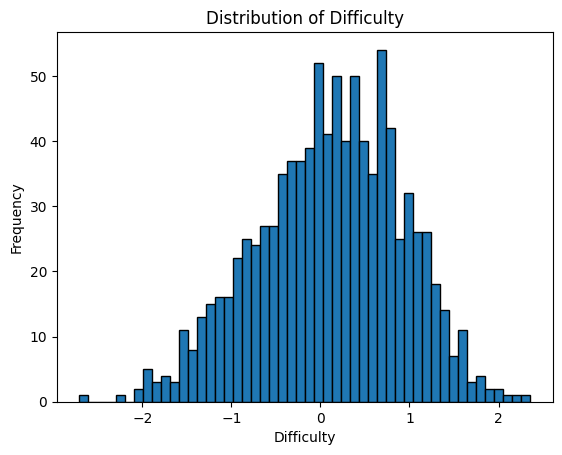

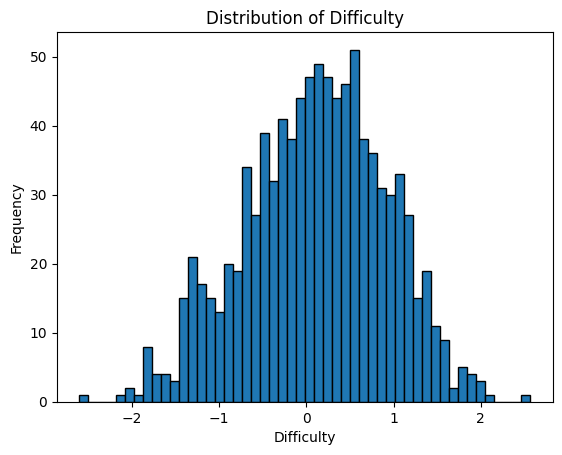

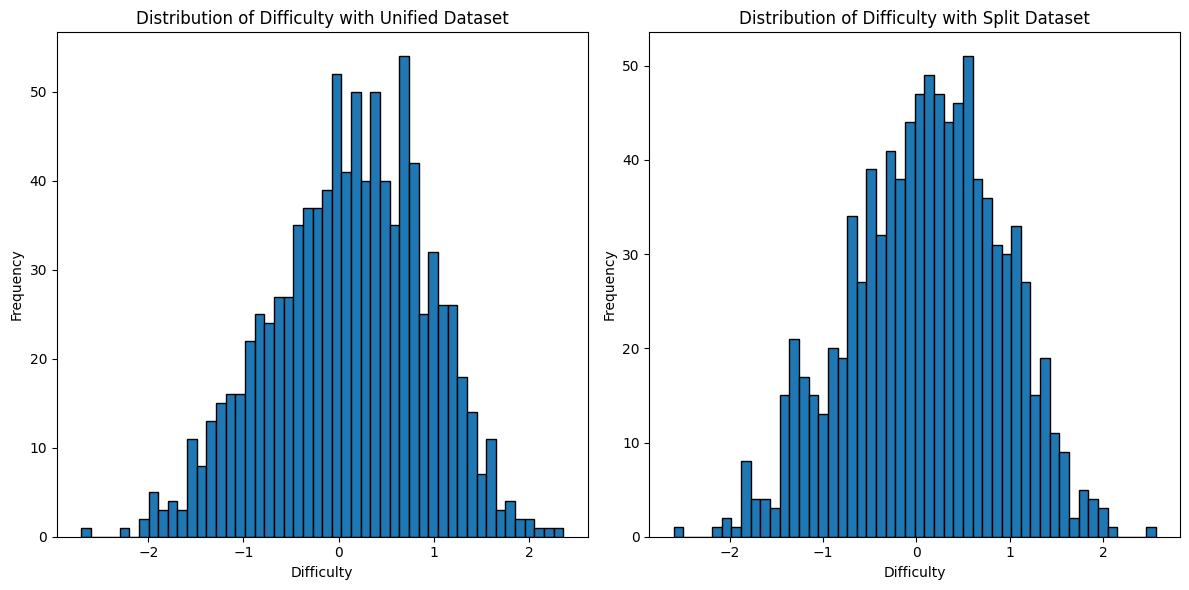

In [ ]:
df = pd.read_csv(question_ds)

plt.hist(df['difficulty'], bins=50, edgecolor='black')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Difficulty')
plt.show()

df2 = pd.read_csv(question_split_ds)

plt.hist(df2['difficulty'], bins=50, edgecolor='black')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Distribution of Difficulty')
plt.show()

# Assuming you have two DataFrames: df and df2

# Create a figure with a larger width
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
axes[0].hist(df['difficulty'], bins=50, edgecolor='black')
axes[0].set_xlabel('Difficulty')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Difficulty with Unified Dataset')

# Plot the second histogram
axes[1].hist(df2['difficulty'], bins=50, edgecolor='black')
axes[1].set_xlabel('Difficulty')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Difficulty with Split Dataset')

# Adjust the layout and spacing
plt.tight_layout()

# Display the combined plot
plt.show()

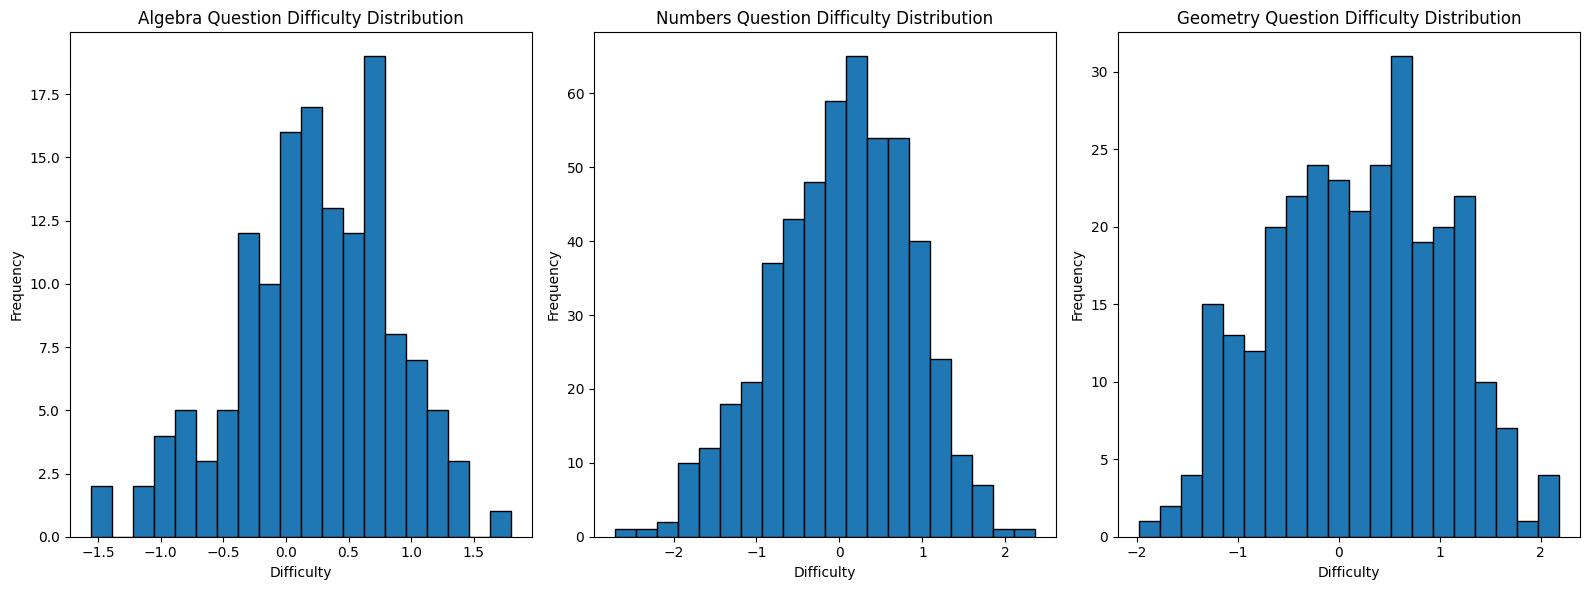

In [ ]:
# Filter the DataFrame for algebra, numbers, and geometry questions
algebra_df = df[df['id'].isin(algebra_questions)]
numbers_df = df[df['id'].isin(numbers_questions)]
geometry_df = df[df['id'].isin(geometry_questions)]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot the distribution of 'difficulty' for algebra questions
axes[0].hist(algebra_df['difficulty'], bins=20, edgecolor='black')
axes[0].set_xlabel('Difficulty')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Algebra Question Difficulty Distribution')

# Plot the distribution of 'difficulty' for numbers questions
axes[1].hist(numbers_df['difficulty'], bins=20, edgecolor='black')
axes[1].set_xlabel('Difficulty')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Numbers Question Difficulty Distribution')

# Plot the distribution of 'difficulty' for geometry questions
axes[2].hist(geometry_df['difficulty'], bins=20, edgecolor='black')
axes[2].set_xlabel('Difficulty')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Geometry Question Difficulty Distribution')

# Adjust the layout and spacing
plt.tight_layout()

# Display the combined plot
plt.show()

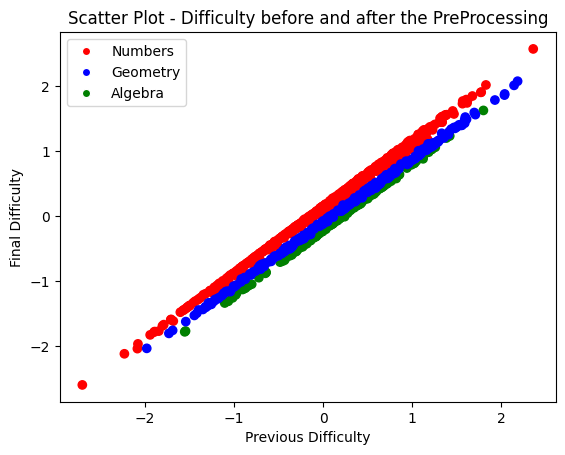

In [7]:
df = pd.read_csv(question50_split_ds)

# Assigning colors based on class values
class_colors = {'numbers': 'red', 'geometry': 'blue', 'algebra': 'green'}
colors = [class_colors[c] for c in df['class']]

# Creating the scatter plot
plt.scatter(df['unified_difficulty'], df['difficulty'], c=colors)

# Adding labels and title
plt.xlabel('Previous Difficulty')
plt.ylabel('Final Difficulty')
plt.title('Scatter Plot - Difficulty before and after the PreProcessing')

# Adding a legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Numbers'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Geometry'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', label='Algebra')
]
plt.legend(handles=legend_elements)

# Displaying the plot
plt.show()

In [10]:
# Add a new column 'diff' representing the absolute difference
df['diff'] = abs(df['difficulty'] - df['unified_difficulty'])
print(df.head())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   id  node  \
0             0             0          12   10   258   
1             1             1         601  523   153   
2             2             2         287  533    70   
3             3             3         408  534   406   
4             4             4         438   30   153   

                                            question  \
0     What is the equation of this line of symmetry?   
1  Using the key on the right, which of the follo...   
2                        What belongs in the spaces?   
3                     The red line is to the y axis?   
4  89+ 20. Tom and Katie are talking about differ...   

                                           embedding  prediction  \
0  [ 0.8267492  -0.8998549  -3.18051    -0.893104...    0.689411   
1  [-1.4250584   0.6823078  -0.11175448 -0.446427...    0.377144   
2  [-6.204728   -2.0550032   2.773053    0.651398...    0.086367   
3  [ 1.3103861  2.7932596  2.6833606  0.1329969 -...  

In [11]:
# Compute the minimum and maximum values of 'diff' per class
diff_stats = df.groupby('class')['diff'].agg(['min', 'max'])

# Display the results
print(diff_stats)

               min       max
class                       
algebra   0.175924  0.252208
geometry  0.048254  0.176820
numbers   0.000192  0.210642


In [12]:
# Calculate the interpolation line for each class
interpolation_lines = {}
for class_name, class_data in df.groupby('class'):
    x = class_data['unified_difficulty']
    y = class_data['difficulty']
    coefficients = np.polyfit(x, y, 1)  # Fit a linear polynomial of degree 1
    interpolation_lines[class_name] = coefficients

# Display the interpolation lines
for class_name, coefficients in interpolation_lines.items():
    slope, intercept = coefficients
    print(f"Interpolation line for {class_name}: y = {slope:.2f}x + {intercept:.2f}")

Interpolation line for algebra: y = 1.02x + -0.23
Interpolation line for geometry: y = 0.98x + -0.10
Interpolation line for numbers: y = 1.01x + 0.13
